In [39]:
import numpy as np  # 행렬연산에 필요

In [88]:
import os
from imageio import imread
from PIL import Image
from IPython.display import clear_output
import matplotlib.pyplot as plt

print("package loaded.")

package loaded.


scipy,misc
-numpy와 함께 다루면 큰 통계자료도 이용가능,
-과학기술계산을 위한 Python 라이브러리

__folder image 불러오기__ 

In [89]:
def print_typeshape(img):
        print("Type is %s" % (type(img)))
        print("Shape is %s" % (img.shape,))   #error : img.shape를 image 로 씀
                                              # shape(높이, 너비.채널)

In [90]:
yj=imread("yj3.jpg")
print_typeshape(yj)

Type is <class 'imageio.core.util.Array'>
Shape is (1200, 873, 3)


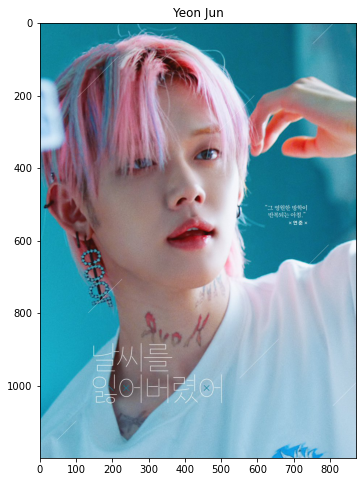

In [91]:
plt.figure(figsize=(8,8))
plt.imshow(yj)
plt.title("Yeon Jun")
plt.draw()

In [92]:
yj2=imread("yj3.jpg").astype(np.float)/255   # int(0~255)형태인 것을 float로 바꿨기 때문 , 띠라서 255로 나눠주기
print_typeshape(yj2)

Type is <class 'imageio.core.util.Array'>
Shape is (1200, 873, 3)


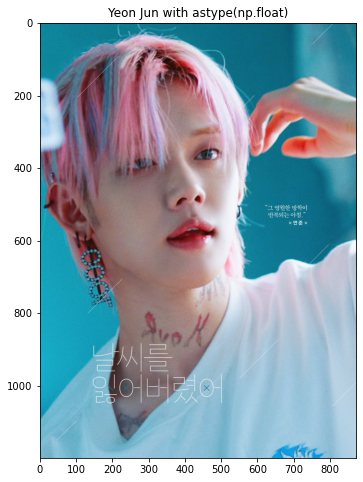

In [93]:
plt.figure(figsize=(8,8))
plt.imshow(yj2)
plt.title("Yeon Jun with astype(np.float)")
plt.draw()

__image resize(사이즈 바꾸기)__

In [125]:
yj3=Image.open("yj3.jpg")
yj3_resize=yj3.resize((100,100))        # 해상도와 연결되는데?
yj3_resize.save("yj", "JPEG", quality=95 )


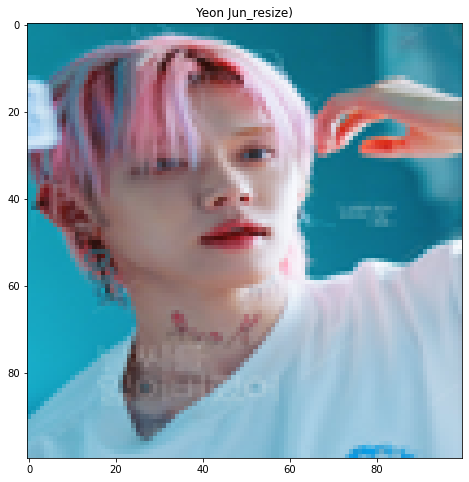

In [126]:
plt.figure(figsize=(8,8))
plt.imshow(yj3_resize)
plt.title("Yeon Jun_resize)")
plt.draw()

shape(100,100,3)

__gray scale__

In [132]:
def rgb2gray(rgb):
    if len(rgb.shape) is 3:
        return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])  #rgb에 곱해주면 회색으로
    else:
        print (":Current Image if GRAY!")
        return rgb


size of yj_gray is (1200, 873)
type of yj_gray is <class 'imageio.core.util.Array'>


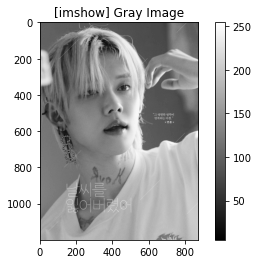

In [136]:
yj_gray = rgb2gray(yj)
print("size of yj_gray is %s" % (yj_gray.shape,))
print ("type of yj_gray is", type(yj_gray))

plt.imshow(yj_gray, cmap=plt.get_cmap("gray")) #plt.get_cmap("gray")를 해줘야 회색으로 나옴
plt.title("[imshow] Gray Image")
plt.colorbar()
plt.draw()

__image reshape(모양 바꾸기)__

In [145]:
#vector
yjrowvec = np.reshape(yj_gray, (1, -1));     
print("size of yjrowvec is %s" % (yjrowvec.shape,))


size of yjrowvec is (1, 1047600)


In [151]:
# VECTOR TO MATRIX
yjmatrix = np.reshape(yjrowvec, (100, -1));
print ("size of yjmatrix is %s" % (yjmatrix.shape,))
print ("type of yjmatrix is", type(yjmatrix))

size of yjmatrix is (100, 10476)
type of yjmatrix is <class 'imageio.core.util.Array'>


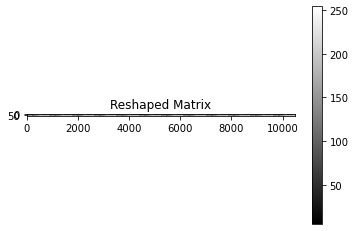

In [152]:
plt.imshow(yjmatrix, cmap=plt.get_cmap("gray"))
plt.title("Reshaped Matrix")
plt.colorbar()
plt.draw()

__Load from folder__

In [157]:
# 폴더 안에는 무엇이 있나?
cwd = os.getcwd()
path = cwd + "/data/"
flist = os.listdir(path)
print ("[%d] FILE ARE IN [%s]" % (len(flist), path))

[3] FILE ARE IN [C:\Users\user\git\github\2021-02-05\image_segmentation/data/]


In [158]:
# LIST UP FILES INSIDE THE FOLDER
for i, f in enumerate(flist):       # enumerate:반복문 사용 시 몇 번째 반복문인지 확인가능
    print ("[%d] TH FILE IS [%s]" % (i, f))

[0] TH FILE IS [yj1.png]
[1] TH FILE IS [yj2.png]
[2] TH FILE IS [yj4.gif]


In [162]:
# 다음과 같은 확장자를 가진 사진만 불러오기
valid_exts = [".jpg", ".gif", ".png", ".tga", ".jpeg"]
imgs = []
names = []
for f in flist:
    ext = os.path.splitext(f)[1]
    if ext.lower() not in valid_exts:
        continue
    fullpath = os.path.join(path, f)
    imgs.append(imread(fullpath))
    names.append(os.path.splitext(f)[0])


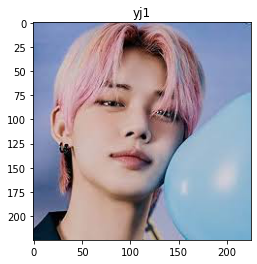

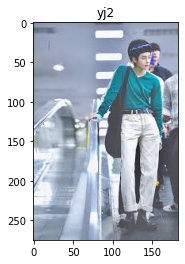

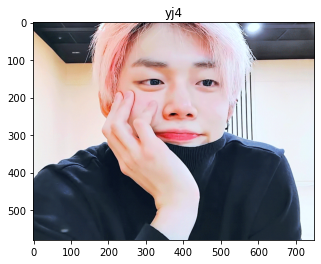

In [163]:
for img, name in zip(imgs, names):
    plt.imshow(img)
    plt.title(name)
    plt.show()